# Simulating the deformation of a simply supported beam
In this notebook we attempt to simulate the following equation numerically:
$$\frac{\partial^2}{\partial x^2}(EI \frac{\partial^2 y}{\partial x^2}) = q(x) $$

We first assume that E and I are constants, and use FDM for spatial discretization.
$$EI\Delta^2 \textbf{y} = A^2 \textbf{y} = \textbf{q}(x) $$


In [ ]:
using SparseArrays
using Plots

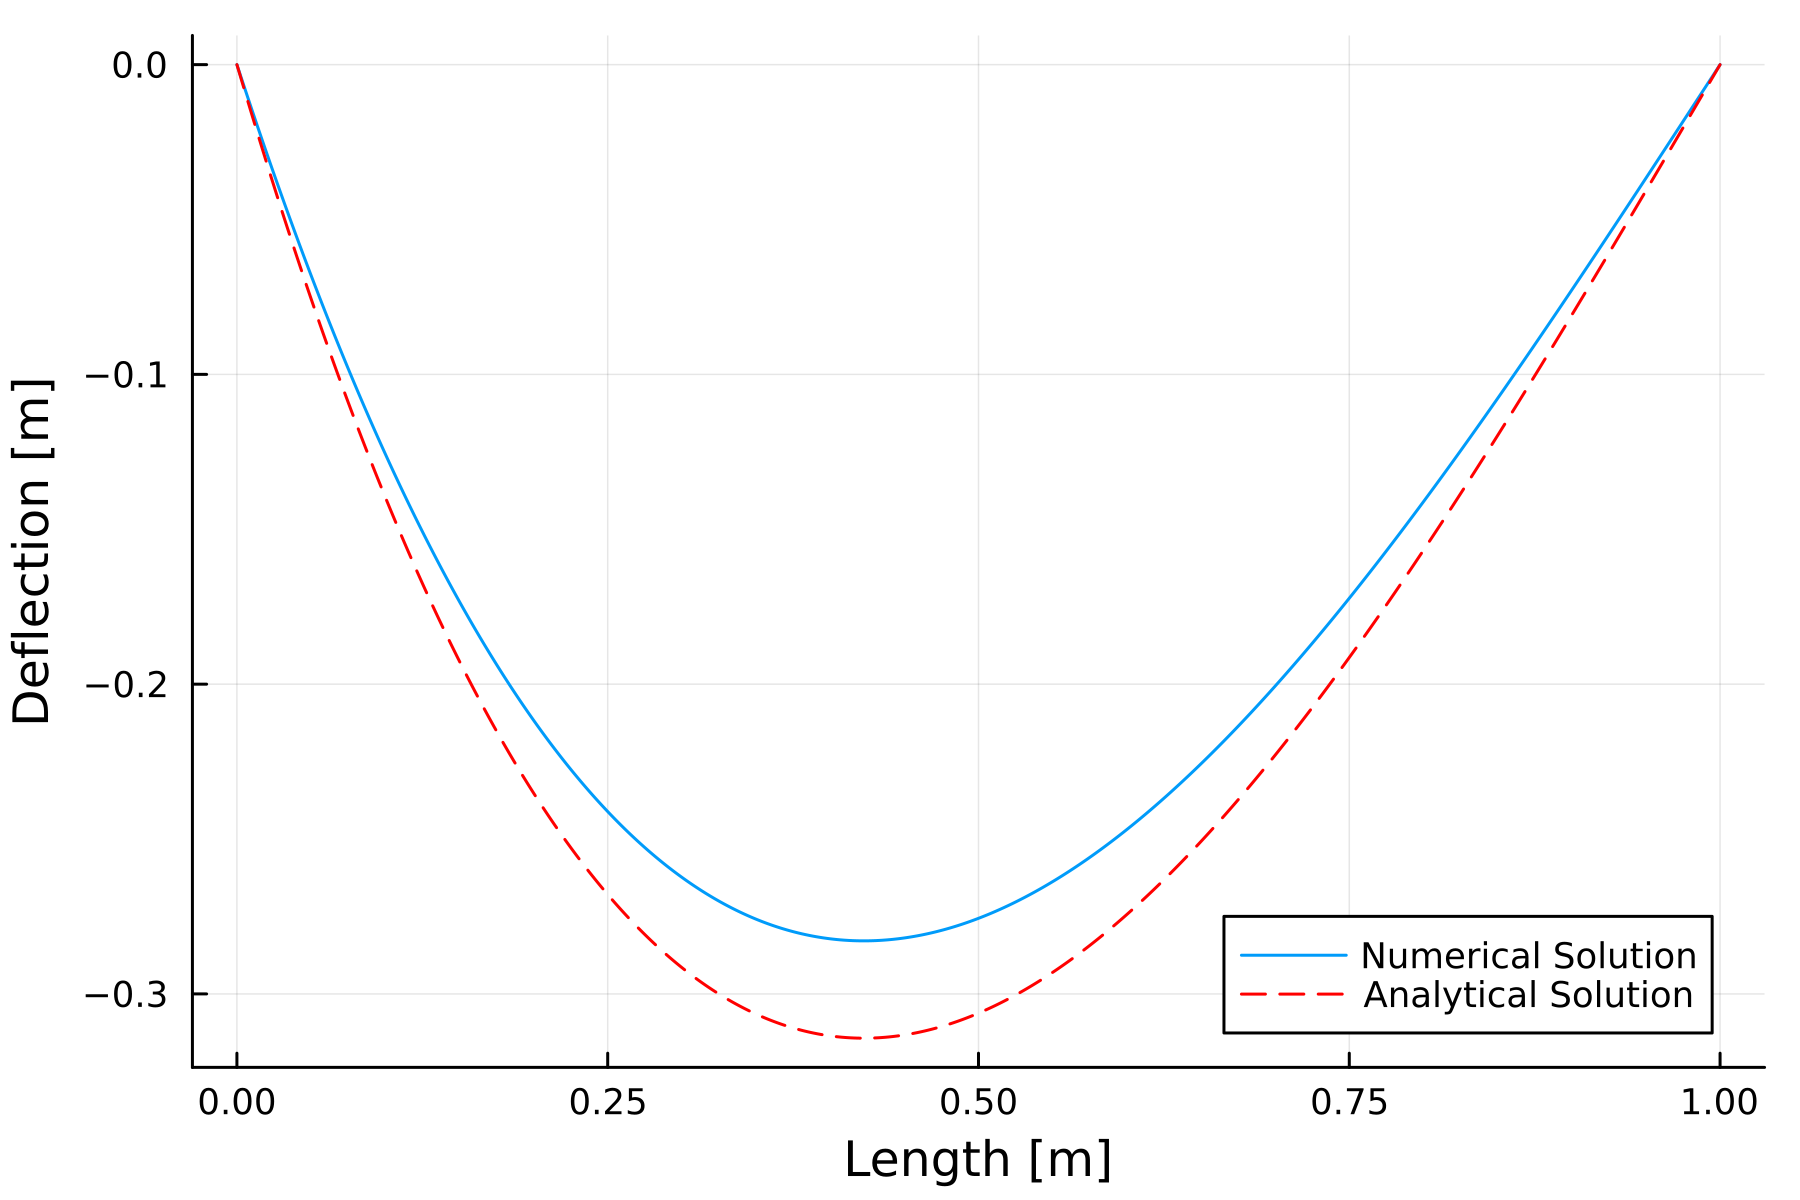

In [6]:
function matrixA(N, h)
    norm = 1/(h*h)
    ## Compute diagonals
    v1 = -2*norm*ones(N)
    v2 = norm*ones(N-1)
    v3 = v2
    v1[1]   = 1
    v1[end] = 1
    v2[1]   = 0
    v3[end] = 0

    ## Construct the 1D forward difference matrix
    A = spdiagm(-1 => v3, 0 => v1, 1 => v2)

    ## Construct the system matrix A, [and exclude all zeros]
    A2 = dropzeros(A * A * EI)
end

function q(N, h, xp, load)
    v      = zeros(N)
    v[xp]  = load / h
    ## Initial conditions
    v[1]   = 0
    v[end] = 0
    v
end

function analytical_solution(N, h, L, x, xp, load)
    # First half of the beam
    a = xp * h
    # Last half of the beam
    b = L - a
    # creating a solution array
    w = []
    for xi in x
        if xi <= a
            push!(w, (load * b * xi * (L * L - b * b - xi^2)) / (6 * L * EI))
        else 
            push!(w, (load * b * xi * (L * L - b * b - xi^2))/(6 *L * EI) + (load * (xi - a)^3) / (6 * EI))
        end
    end
    w
end

## Constants
N    = 1001; #uneven number (we start counting at 1 .. index)
xp   = 10;
L    = 1;
h    = L / (N-1);
EI   = 1;
load = 490;
dpi = 300

## 
A2 = matrixA(N, h);
qx = q(N, h, xp, load);

## Solutions to plot
x = 0 : h : L
yA = analytical_solution(N, h, L, x, xp, load)
yN = A2 \ (qx / EI)                 ## Iterative solver? Equivalent of spsolve in Python?

## Plotting
plot(x, -yN, label="Numerical Solution", xlabel="Length [m]", ylabel="Deflection [m]", show=true, dpi=dpi)
plot!(x, -yA, label="Analytical Solution", linestyle=:dash, color=:red, show=true, dpi=dpi)